In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.cm as cm
import numpy as np
import os
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.cluster import contingency_matrix

In [154]:
excel_file = 'train/classif.xlsx'
data_feature_file = 'data_features.csv'

# Load classification file
def load_classification(excel_file):
    if os.path.exists(excel_file):
        return pd.read_excel(excel_file)
    else:
        print(f"Excel file {excel_file} not found.")
        return None
    
# Load features
def load_features(data_feature_file):
    if os.path.exists(data_feature_file):
        return pd.read_csv(data_feature_file)
    else:
        print(f"Feature file {data_feature_file} not found.")
        return None    

classif_df = load_classification(excel_file)
filtered_indices = classif_df[classif_df['bug_type'].str.contains('&')].index
classif_df = classif_df[~classif_df['bug_type'].str.contains('&')]

features_df = load_features(data_feature_file)
features_df = features_df.drop(filtered_indices[0], axis=0)

In [155]:
def ClassifyNN(X, trainX, trainY, K=1):
    C="-1"
    NN = np.zeros(K)
    for k in range(0,K):
        NN[k]=-1
    
    #searching for the K nearest neighhbors
    D=euclidean_distances([X],trainX)
    for k in range(0,K):
       mindist=np.infty
       for i in range(0,len(trainX)):
           
           if k==0:
               if(D[0][i]<mindist):
                   mindist=D[0][i]
                   NN[k]=i
           else:
                if(D[0][i]<mindist and not(i in NN) ):
                   mindist=D[0][i]
                   NN[k]=i                
    
    #classification
    classes= []
    for k in range(0,K):
        classes.append(trainY[NN[k].astype(int)])
    C=max(classes,key=classes.count)
        
    return C

In [156]:
def MyKNN(testX, trainX, trainY, K=1):
    
    if len(trainX)!=len(trainY) or len(trainX[0])!=len(testX[0]):
        return -1
    
    testY = []
    
    for i in range(0,len(testX)):
        testY.append(ClassifyNN(testX[i],trainX,trainY,K))
           
    
    return np.array(testY) 

In [157]:
classif_df_string = classif_df
Y = classif_df_string["bug_type"].to_numpy()
X = features_df.to_numpy()

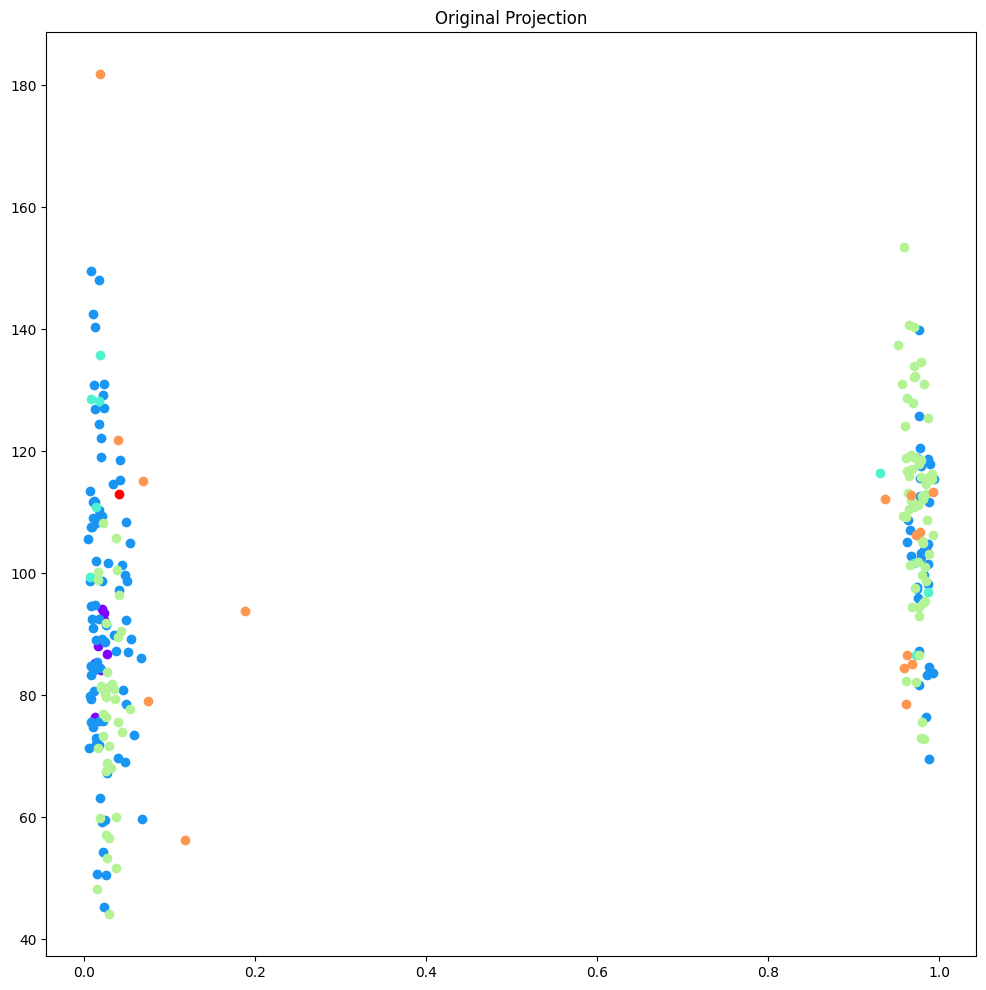

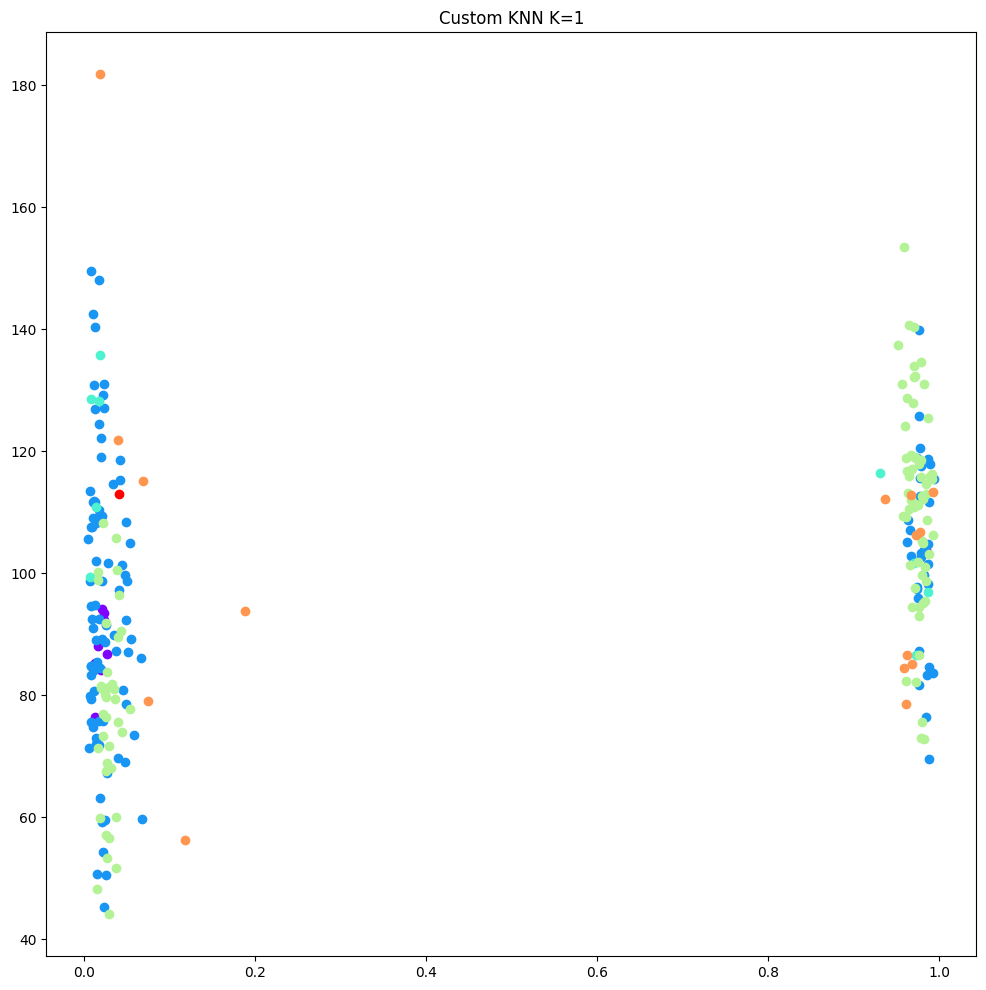

In [158]:
fig, ax = plt.subplots(figsize=(12,12))  
unique_labels = set(Y)
n_clusters = len(unique_labels)
colors = [plt.cm.rainbow(each) for each in np.linspace(0, 1, len(unique_labels))]
for klass, color in zip(unique_labels, colors):
    Xk=X[Y == klass]   
    ax.scatter(Xk[:,0], Xk[:,1], color=color)   
plt.title("Original Projection")
plt.show()


K=1
res=MyKNN(X,X,Y,K)

fig, ax = plt.subplots(figsize=(12,12))  
for klass, color in zip(unique_labels, colors):
    Xk=X[res == klass]   
    ax.scatter(Xk[:,0], Xk[:,1], color=color)   
plt.title("Custom KNN K=%d" % K )
plt.show()

In [159]:
K=1
res=MyKNN(X,X,Y,K)
contingency = contingency_matrix(Y, res)
print("Contingency matrix for K={}:\n {}".format(K,contingency))

Contingency matrix for K=1:
 [[115   0   0   0   0   0]
 [  0 100   0   0   0   0]
 [  0   0  15   0   0   0]
 [  0   0   0   1   0   0]
 [  0   0   0   0   9   0]
 [  0   0   0   0   0   9]]


In [160]:
K=3
res=MyKNN(X,X,Y,K)
contingency = contingency_matrix(Y, res)
print("Contingency matrix for K={}:\n {}".format(K,contingency))

Contingency matrix for K=3:
 [[98 17  0  0  0  0]
 [14 86  0  0  0  0]
 [ 2  5  8  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  2  0  0  7  0]
 [ 1  0  0  0  0  8]]


In [161]:
K=5
res=MyKNN(X,X,Y,K)
contingency = contingency_matrix(Y, res)
print("Contingency matrix for K={}:\n {}".format(K,contingency))

Contingency matrix for K=5:
 [[94 20  0  0  1]
 [17 82  1  0  0]
 [ 6  8  1  0  0]
 [ 1  0  0  0  0]
 [ 3  5  0  1  0]
 [ 2  1  0  0  6]]


In [162]:
K=7
res=MyKNN(X,X,Y,K)
contingency = contingency_matrix(Y, res)
print("Contingency matrix for K={}:\n {}".format(K,contingency))

Contingency matrix for K=7:
 [[90 24  0  1]
 [22 78  0  0]
 [ 9  5  1  0]
 [ 1  0  0  0]
 [ 1  7  0  1]
 [ 3  2  0  4]]


In [163]:
#decision tree
from IPython.display import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score

In [164]:
target_labels = classif_df_string.bug_type
train_predictor_columns = ['ratio','mean_red','mean_green','mean_blue','median_red','median_green','median_blue','homogeneity','energy']
train_feats = features_df

In [165]:
x_train,x_test,y_train,y_test  = train_test_split(train_feats,target_labels, test_size=0.1, random_state = 0)

In [166]:
clf =tree.DecisionTreeClassifier(max_depth=7) #On peut jouer sur la profondeur de l'arbre ici
clf=clf.fit(x_train, y_train)

In [167]:
y_pred = clf.predict(x_train[train_predictor_columns])
#display the metrics
print(metrics.classification_report(y_train, y_pred))

              precision    recall  f1-score   support

         Bee       0.91      1.00      0.95       106
   Bumblebee       0.99      0.85      0.91        87
   Butterfly       0.81      0.87      0.84        15
   Dragonfly       1.00      1.00      1.00         1
   Hover fly       1.00      1.00      1.00         6
        Wasp       0.80      0.89      0.84         9

    accuracy                           0.93       224
   macro avg       0.92      0.93      0.92       224
weighted avg       0.93      0.93      0.93       224



In [168]:
#application sur test set 
y_pred = clf.predict(x_test[train_predictor_columns])
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         Bee       0.62      0.89      0.73         9
   Bumblebee       0.90      0.69      0.78        13
   Hover fly       1.00      0.33      0.50         3
        Wasp       0.00      0.00      0.00         0

    accuracy                           0.72        25
   macro avg       0.63      0.48      0.50        25
weighted avg       0.81      0.72      0.73        25



In [169]:
#naive bayes
from sklearn.naive_bayes import GaussianNB

In [170]:
gnbModel=GaussianNB()
gnbModel=gnbModel.fit(x_train, y_train)
y_pred = gnbModel.predict(x_train[train_predictor_columns]) 
print(metrics.classification_report(y_train, y_pred))

              precision    recall  f1-score   support

         Bee       0.71      0.58      0.64       106
   Bumblebee       0.66      0.64      0.65        87
   Butterfly       0.11      0.07      0.08        15
   Dragonfly       1.00      1.00      1.00         1
   Hover fly       0.33      0.33      0.33         6
        Wasp       0.22      0.89      0.36         9

    accuracy                           0.58       224
   macro avg       0.51      0.59      0.51       224
weighted avg       0.62      0.58      0.59       224



In [171]:
#application sur test set 
y_pred = gnbModel.predict(x_test[train_predictor_columns])
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         Bee       0.62      0.56      0.59         9
   Bumblebee       0.71      0.38      0.50        13
   Butterfly       0.00      0.00      0.00         0
   Hover fly       1.00      0.33      0.50         3
        Wasp       0.00      0.00      0.00         0

    accuracy                           0.44        25
   macro avg       0.47      0.25      0.32        25
weighted avg       0.72      0.44      0.53        25



CLUSTERING


In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.cm as cm
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from sklearn.metrics.cluster import contingency_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import warnings
warnings.filterwarnings('ignore')

Matrice de confusion pour random_state = 3:
[[ 8 23  2  0  4  0]
 [16 22  2  0  0  2]
 [31 12  3  0  0  0]
 [33 19  5  0  1  6]
 [19 19  2  1  4  1]
 [ 8  5  1  0  0  0]]
Matrice de confusion pour random_state = 5:
[[30 21  2  0  1  7]
 [ 9 26  2  0  4  0]
 [34  9  3  0  0  0]
 [13 19  1  0  0  1]
 [ 8  6  1  0  0  0]
 [21 19  6  1  4  1]]
Matrice de confusion pour random_state = 10:
[[32 23  6  1  4  0]
 [13 17  1  0  0  1]
 [24 12  3  0  0  0]
 [ 8  6  1  0  0  0]
 [30 21  2  0  1  7]
 [ 8 21  2  0  4  1]]
Matrice de confusion pour random_state = 50:
[[11 21  1  1  3  1]
 [30 24  2  0  1  8]
 [19 26  3  0  4  0]
 [38  9  7  0  1  0]
 [ 8  7  1  0  0  0]
 [ 9 13  1  0  0  0]]
Matrice de confusion pour random_state = 70:
[[ 8  6  1  0  0  0]
 [31 21  2  0  1  7]
 [20 19  6  1  4  1]
 [13 19  1  0  0  1]
 [ 9 25  2  0  4  0]
 [34 10  3  0  0  0]]
Matrice de confusion pour random_state = 80:
[[28 12  4  0  0  0]
 [26 23  2  0  1  8]
 [10  7  1  0  1  0]
 [33 16  5  0  4  0]
 [ 9 30  2  1

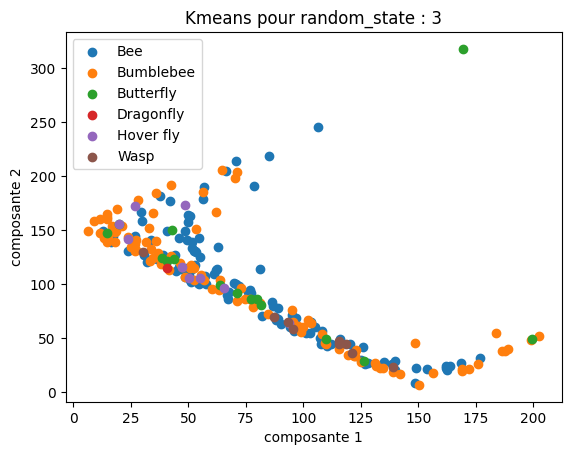

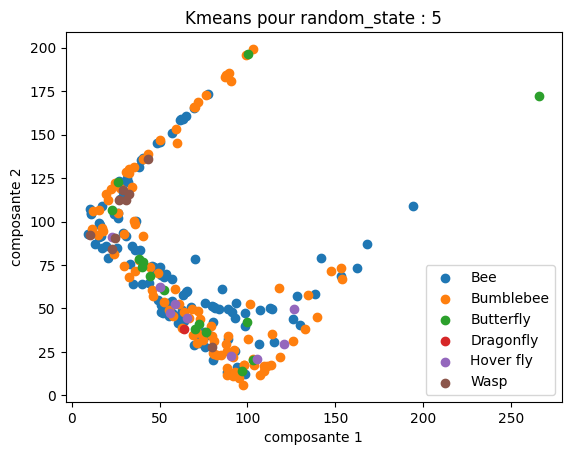

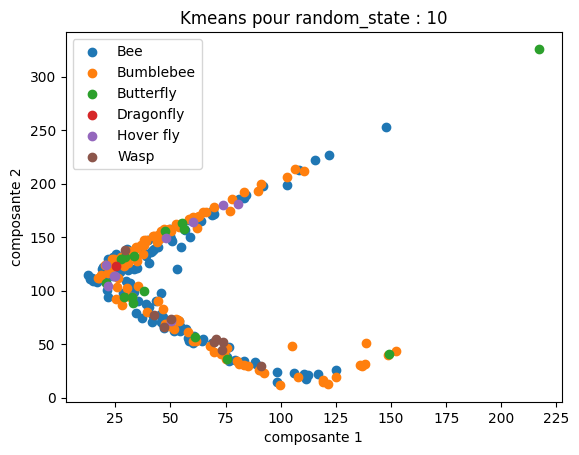

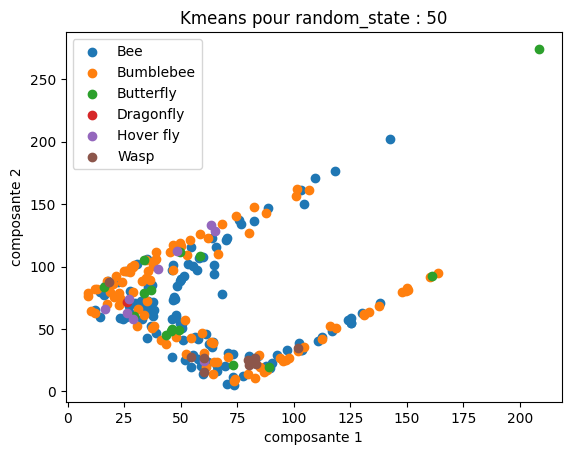

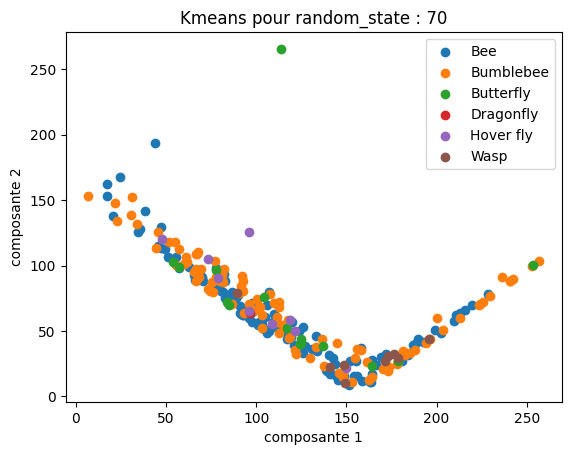

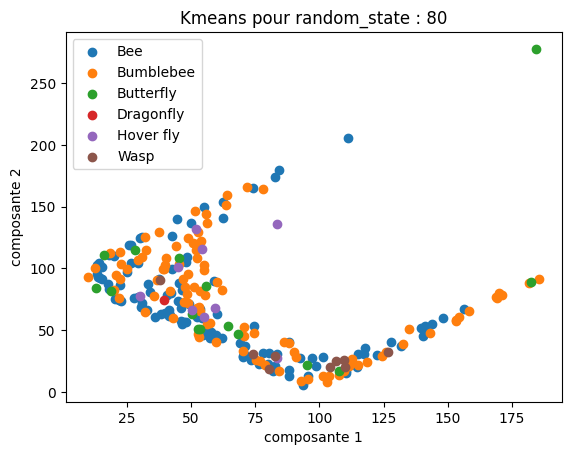

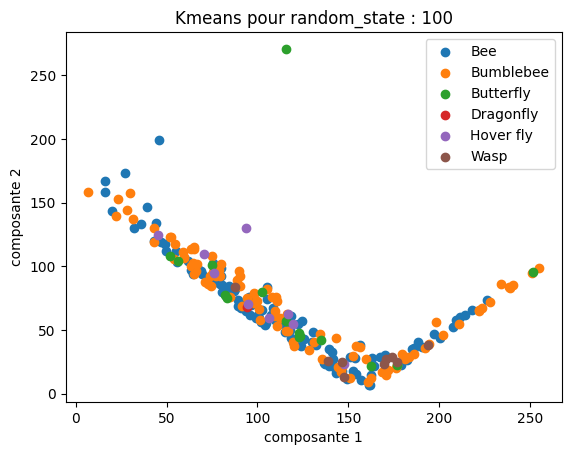

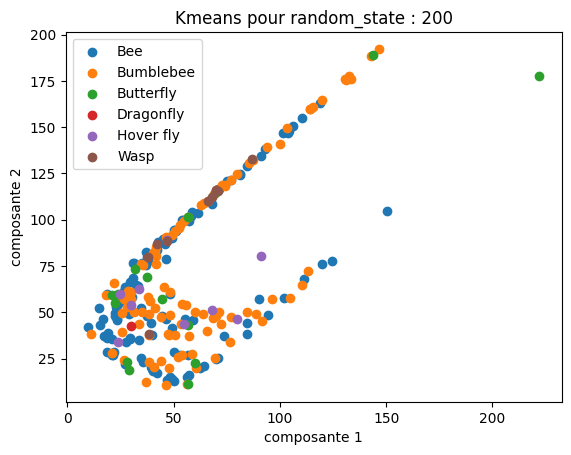

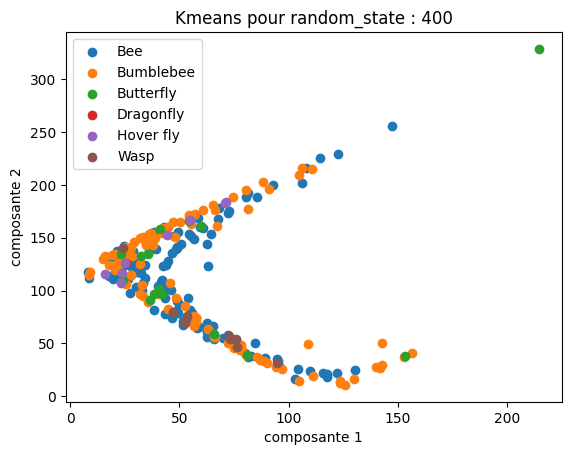

In [190]:
list_random_state_value = [3,5,10,50,70,80,100,200,400]
digit_class=classif_df_string["bug_type"]
dig_list=np.unique(digit_class.values)

for val in list_random_state_value:
    kmeans2 = KMeans(n_clusters=6, random_state=val)
    digit_kmean2 = kmeans2.fit_transform(X)
    fig, ax = plt.subplots();
    for dig in dig_list:
        ax.scatter(digit_kmean2[digit_class==dig, 0], digit_kmean2[digit_class==dig, 1],label=dig);

    ax.legend();
    ax.set_xlabel("composante 1");
    ax.set_ylabel("composante 2");
    ax.set_title('Kmeans pour random_state : {0}'.format(val), fontsize=12);
    print("Matrice de confusion pour random_state = {0}:".format(val));
    print(contingency_matrix(kmeans2.labels_,classif_df_string['bug_type'].values))

plt.show();

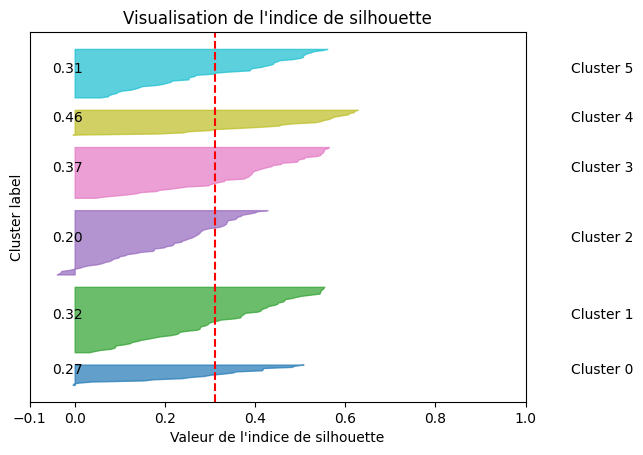

In [191]:
def plot_silhouette(data, nb_clusters):
    """
    Plot silhouette visualization for clusters and data points.

    Parameters:
        data (array-like): The input data.
        nb_clusters (int): The number of clusters.
    """
    # Calcule le KMeans
    kmeans = KMeans(n_clusters=nb_clusters, random_state=0)
    clusters = kmeans.fit_predict(data)

    # Calcule l'indice de silhouette pour données
    silhouette_vals = silhouette_samples(data, clusters)
    y_lower = 10
    
    # Affichage
    fig, ax = plt.subplots(1, 1)
    
    for i in range(nb_clusters):
        # Réccupère les indices de silhouette de chaque données inclus dans le cluster i
        cluster_silhouette_vals = silhouette_vals[clusters == i]
        cluster_silhouette_vals.sort()
        
        # Calcule de l'indice de silhouette pour le cluster i
        silhouette_i = np.mean(cluster_silhouette_vals)

        y_upper = y_lower + cluster_silhouette_vals.shape[0]
        
        # Ajout de couleur pour chaque cluster
        color = plt.cm.tab10(float(i) / np.max(clusters))
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, cluster_silhouette_vals,
                          facecolor=color, edgecolor=color, alpha=0.7)
        
        ax.text(-0.05, y_lower + 0.5 * cluster_silhouette_vals.shape[0], f"{silhouette_i:.2f}") # Affichage de silhouette_i
        ax.text(1.1, y_lower + 0.5 * cluster_silhouette_vals.shape[0], f"Cluster {i}") # Affichage du numéro de cluster
        
        y_lower = y_upper + 10
        
    ax.set_xlabel("Valeur de l'indice de silhouette")
    ax.set_ylabel("Cluster label")
    
    #Ajout d'une ligne verticale rouge qui montre l'indice de silhouette moyen de toutes les données
    silhouette_avg = silhouette_score(data, clusters)
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_yticks([])
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    ax.set_title("Visualisation de l'indice de silhouette")
    
    plt.show()

# Exemple d'utilisation avec iris_df
plot_silhouette(features_df, 6)


In [192]:
kmeans3 = KMeans(n_clusters=3,random_state=5)
silhouette_score(features_df,kmeans3.fit_predict(features_df))

0.3511752705562902

cftp6 graph + silhouette => clustering de merde 

In [193]:
#HCA
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.cluster.hierarchy import cophenet, inconsistent, maxRstat
from scipy.spatial.distance import pdist

Cophenetic Correlation: 0.70


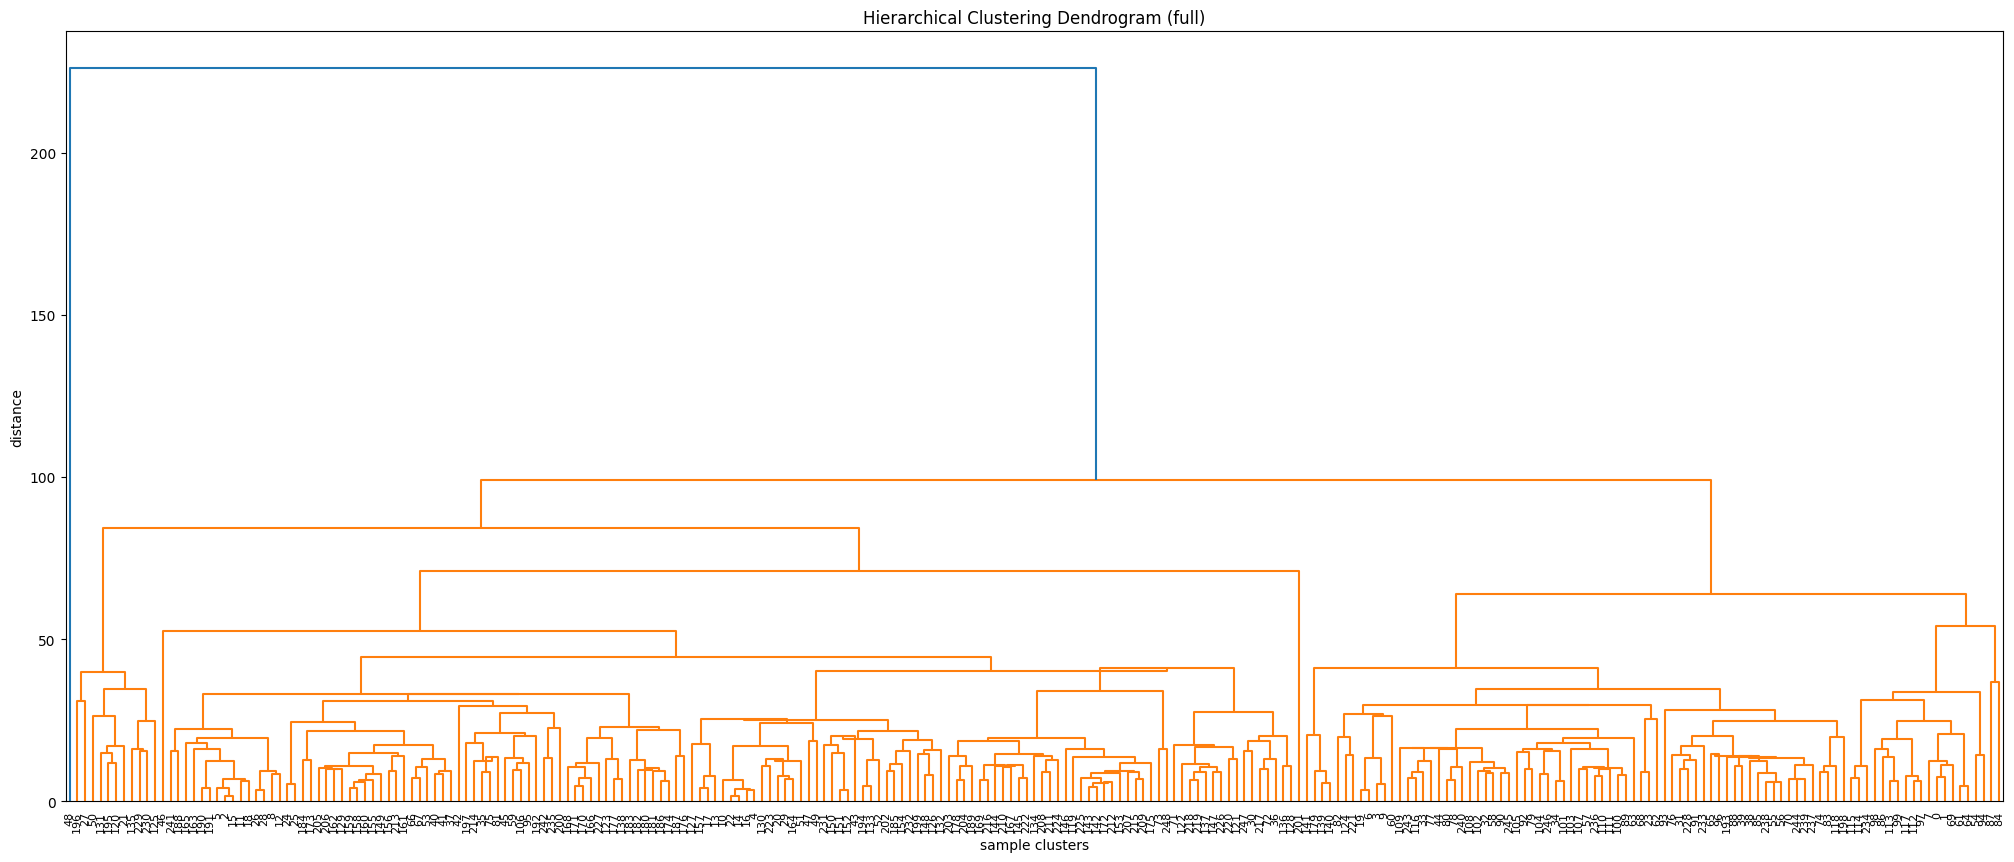

In [194]:
# alternative linkage methods: 'single', 'complete', 'average', 'cityblock' aka Manhattan, 'hamming', 'cosine'...

Z = linkage(X, 'centroid', optimal_ordering=True)

c, coph_dists = cophenet(Z, pdist(X))
print('Cophenetic Correlation: %1.2f' % c)

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram (full)')
plt.xlabel('sample clusters')
plt.ylabel('distance')

dendrogram( Z, leaf_rotation=90., leaf_font_size=8.,)

plt.show()

copho corre = 0.70 assez bien clustering


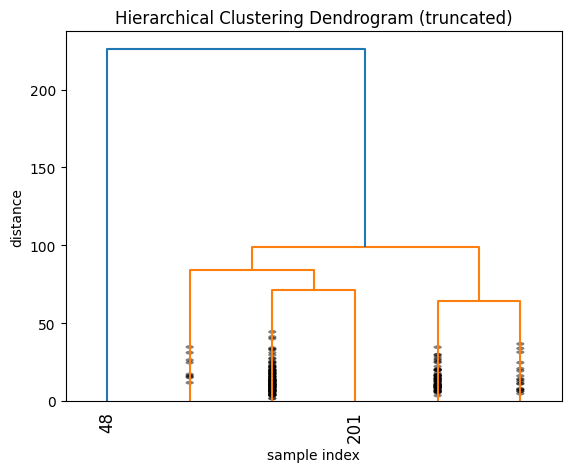

In [195]:
#display truncated dendrogram
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp', #to explain 
    p=6,  #to explain
    show_leaf_counts=False,  
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True, 
)
plt.show()

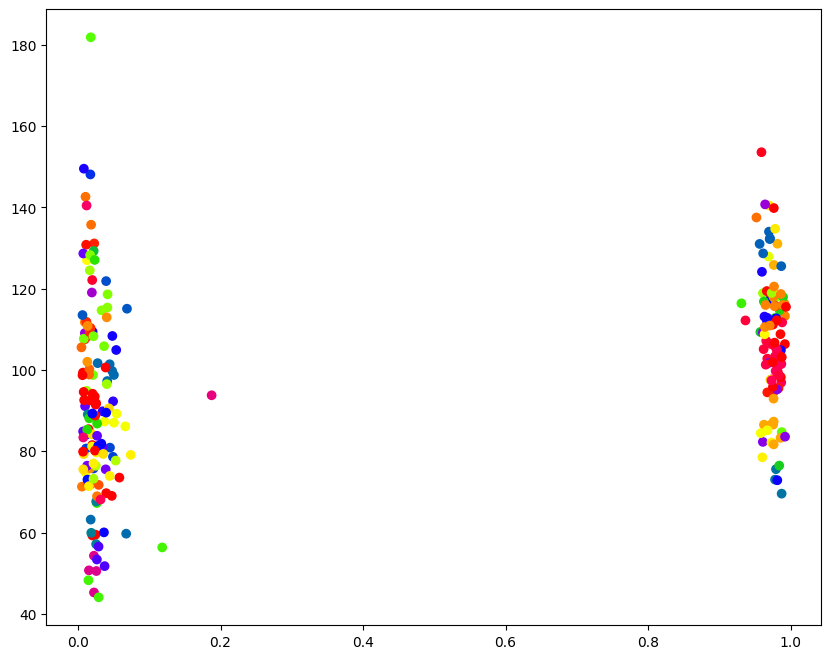

In [196]:
max_d = 15
clusters = fcluster( Z, max_d, criterion='distance')

plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='prism')
plt.show()

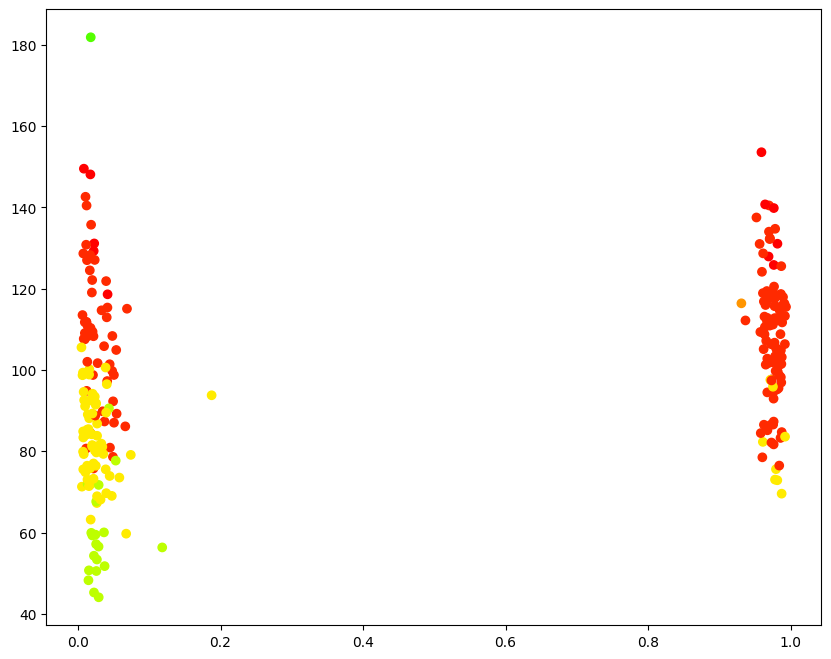

In [197]:
k=6
clusters = fcluster(Z,k,criterion='maxclust')

plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='prism')
plt.show()

In [198]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

In [199]:
history_DB=[]
history_CH=[]
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42).fit(X)
    labels = kmeans.labels_
    value_DB = davies_bouldin_score(X, labels)
    value_CH = calinski_harabasz_score(X, labels)
    history_DB.append(value_DB)
    history_CH.append(value_CH)
x_value = np.arange(2,11)

In [200]:
Delta_DB=np.gradient(history_DB)
print(Delta_DB)

Delta_CH=np.gradient(history_CH)
print(Delta_CH)

[ 2.15666607e-01  1.26995945e-01  1.96162930e-02 -3.21349767e-02
  1.91574970e-03  4.83744204e-02  6.27864549e-04 -1.42321644e-05
  2.64558916e-02]
[-52.74953908 -37.80357882 -16.56158322 -14.16802322 -14.41336421
  -8.41051152  -2.68854968  -6.46025644 -13.6082067 ]


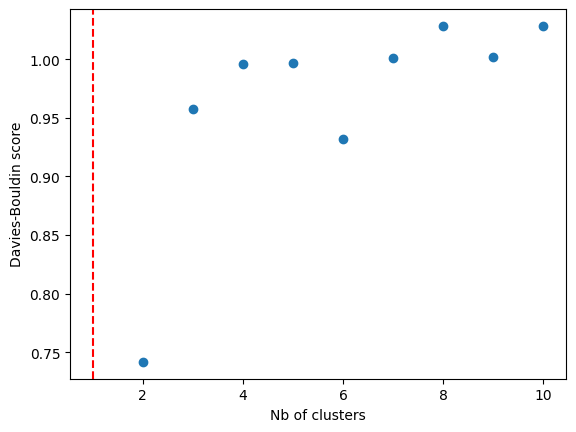

In [201]:
#elbow method
fig, ax = plt.subplots()
ax.scatter(range(2, 11), history_DB)
ax.axvline(x=2+np.argmax(Delta_DB)-1, color="red", linestyle="--", label='the best partition')
ax.set_xlabel("Nb of clusters")
ax.set_ylabel("Davies-Bouldin score")
plt.show()

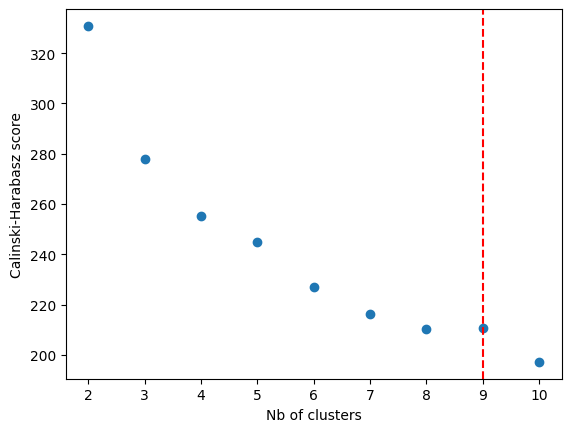

In [202]:
#elbow method
fig, ax = plt.subplots()
ax.scatter(range(2, 11), history_CH)
ax.axvline(x=2+np.argmax(Delta_CH)+1, color="red", linestyle="--", label='the best partition')
ax.set_xlabel("Nb of clusters")
ax.set_ylabel("Calinski-Harabasz score")
plt.show()

In [206]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.cm as cm
import numpy as np
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.neighbors import KernelDensity

from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import OPTICS

from sklearn.metrics.pairwise import euclidean_distances

import warnings
warnings.filterwarnings('ignore')

In [225]:
#meanshift
h=34
ms = MeanShift(bandwidth=h, bin_seeding=True).fit(X)
ms_labels = ms.labels_
cluster_centers_x1 = ms.cluster_centers_

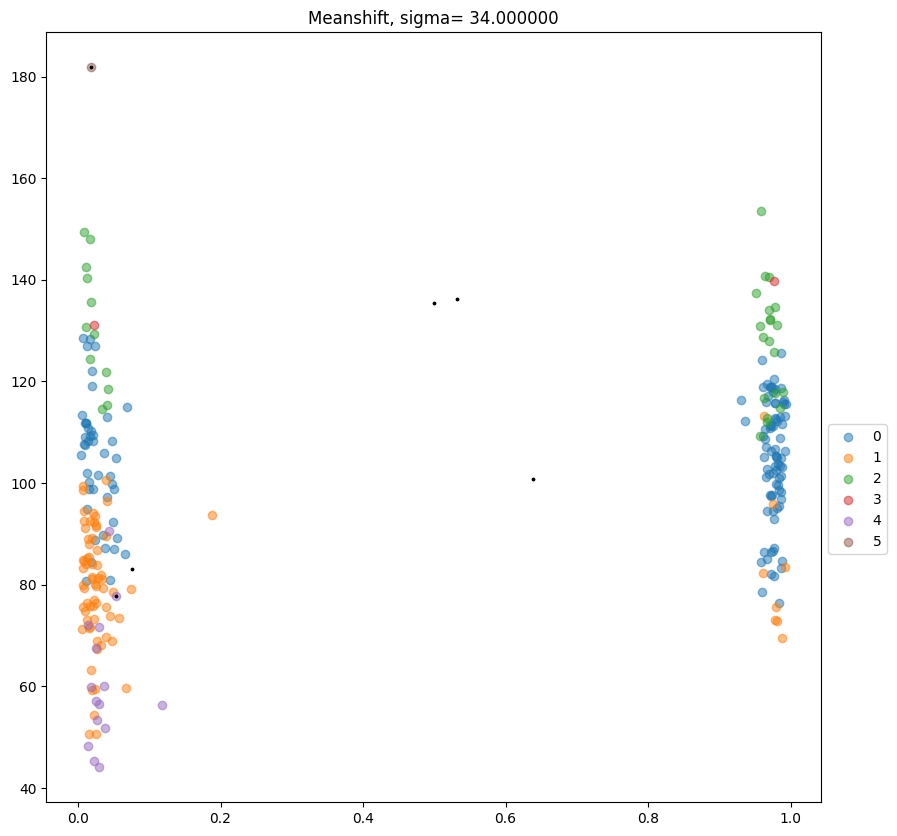

In [226]:
fig, ax = plt.subplots(figsize=(10,10))  
for i, cl in enumerate(np.unique(ms_labels)): 
    ax.scatter(X[:,0][ms_labels==cl], X[:,1][ms_labels==cl], label=cl, alpha=0.5) 
ax.legend(bbox_to_anchor=(1, 0.5))
ax.scatter(cluster_centers_x1[:,0],cluster_centers_x1[:,1],c='black',s=3)
plt.title("Meanshift, sigma= %f" % h)
plt.show()

SAVA 


In [234]:
#OPTICS
clust = OPTICS(min_samples=20, xi=0.05, min_cluster_size=0.05)
clust.fit(X)
x1_labels = clust.labels_
no_clusters = len(np.unique(x1_labels) ) -1
no_noise = np.sum(np.array(x1_labels) == -1, axis=0)
print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

Estimated no. of clusters: 1
Estimated no. of noise points: 228


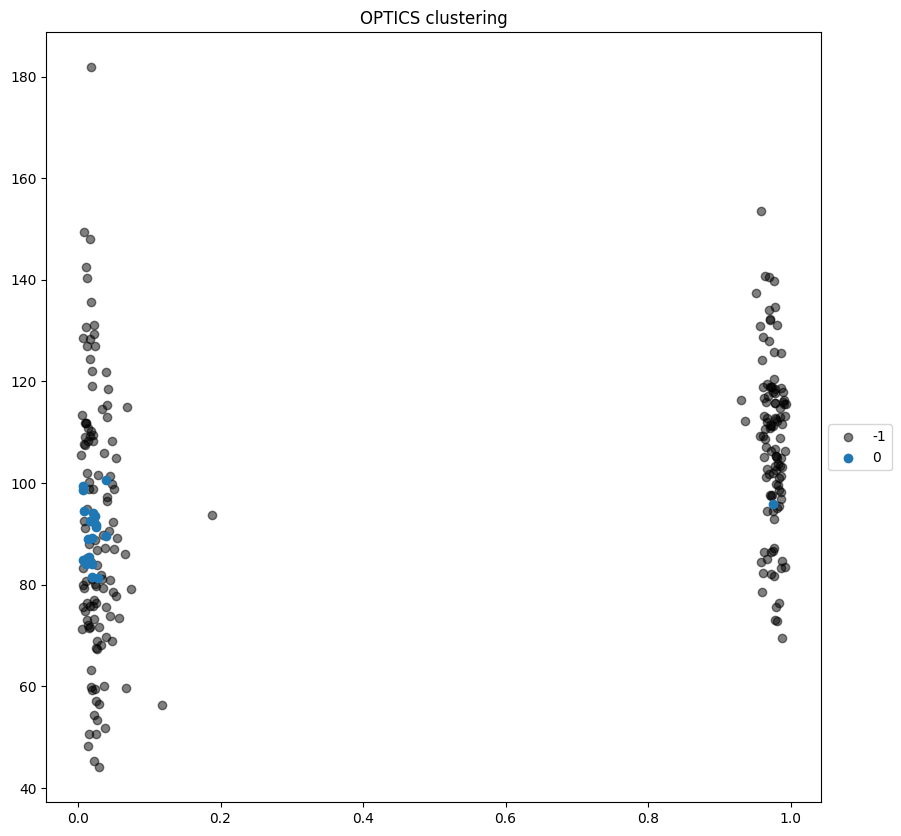

In [235]:
# Generate scatter plot
fig, ax = plt.subplots(figsize=(10,10))  
for i, cl in enumerate(np.unique(x1_labels)):
    if(cl==-1):
        ax.scatter(X[:,0][x1_labels==cl], X[:,1][x1_labels==cl], label=cl, alpha=0.5, color="black") 
    else:
        ax.scatter(X[:,0][x1_labels==cl], X[:,1][x1_labels==cl], label=cl, alpha=1) 
ax.legend(bbox_to_anchor=(1, 0.5))
plt.title('OPTICS clustering')
plt.show()